# Statistics in python

In [1]:
import pandas
data = pandas.read_csv('./brain_size.csv', sep=';', na_values=".")

In [2]:
groupby_gender = data.groupby('Gender')
groupby_gender.size()

Gender
Female    20
Male      20
dtype: int64

In [3]:
for gender, value in groupby_gender['VIQ']:
    print(gender,value.mean())

Female 109.45
Male 115.25


In [4]:
groupby_gender['VIQ'].mean()

Gender
Female    109.45
Male      115.25
Name: VIQ, dtype: float64

In [5]:
groupby_gender.tail().mean()

FSIQ            107.0
VIQ             108.0
PIQ             104.2
Weight          156.5
Height           69.1
MRI_Count    909402.3
dtype: float64

In [6]:
for gender, values in groupby_gender:
    print(gender,'\n', values.mean())

Female 
 FSIQ            111.900
VIQ             109.450
PIQ             110.450
Weight          137.200
Height           65.765
MRI_Count    862654.600
dtype: float64
Male 
 FSIQ            115.000000
VIQ             115.250000
PIQ             111.600000
Weight          166.444444
Height           71.431579
MRI_Count    954855.400000
dtype: float64


/Users/kevinzagalo/anaconda/lib/python3.5/site-packages/pandas/tools/plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


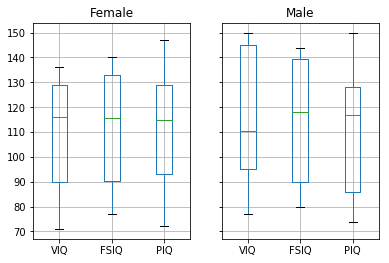

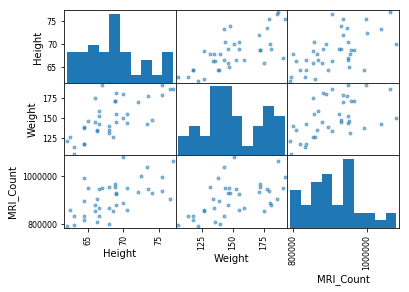

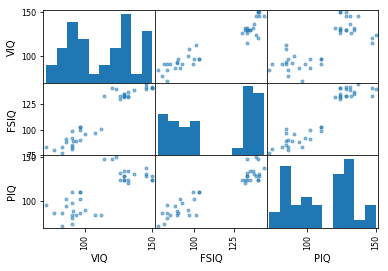

In [9]:
import matplotlib.pyplot as plt
from pandas.tools import plotting

groupby_gender.boxplot(column=['VIQ','FSIQ','PIQ'])
plotting.scatter_matrix(data[['Height','Weight','MRI_Count']])
plotting.scatter_matrix(data[['VIQ','FSIQ','PIQ']])

plt.show()

In [9]:
female_data = data[data['Gender'] == 'Female']
male_data = data[data['Gender'] == 'Male']

In [21]:
groupby_gender.VIQ.mean()

Gender
Female    109.45
Male      115.25
Name: VIQ, dtype: float64

In [22]:
from scipy import stats

stats.ttest_1samp(data['VIQ'],0)

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

In [23]:
stats.ttest_rel(female_data['VIQ'],male_data['VIQ'])

Ttest_relResult(statistic=-0.77576515372505861, pvalue=0.44743691639488103)

/Users/kevinzagalo/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


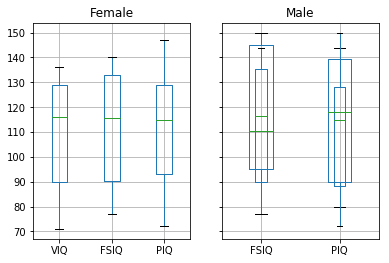

In [24]:
data.boxplot(column=['FSIQ','PIQ'])
plt.show()

In [25]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

Ttest_indResult(statistic=0.46563759638096403, pvalue=0.64277250094148408)

In [26]:
stats.ttest_rel(data['FSIQ'],data['PIQ']) #equivalent à 1samp

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.082172638183642358)

In [27]:
stats.wilcoxon(data['FSIQ'],data['PIQ'])

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

Exercice

In [1]:
female_weight = female_data['Weight']
male_weight = male_data['Weight']
stats.ttest_rel(female_weight,male_weight)

NameError: name 'female_data' is not defined

In [209]:
stats.wilcoxon(female_viq,male_viq)

WilcoxonResult(statistic=82.5, pvalue=0.40071152819253142)

OLS regression

In [32]:
import numpy as np
import pandas

x = np.linspace(-5,5,20)
np.random.seed(1)
y = -5 + 3*x + 4*np.random.normal(size=x.shape)
data = pandas.DataFrame({'x':x,'y':y})

In [33]:
from statsmodels.formula.api import ols

model = ols("y ~ x", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           8.56e-08
Time:                        10:24:17   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

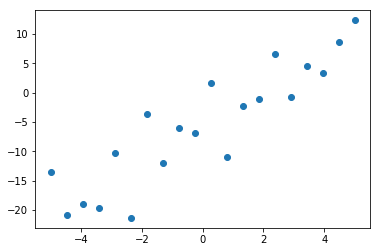

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [36]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values='.')
model = ols("VIQ ~ C(Gender)", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Wed, 10 Oct 2018   Prob (F-statistic):              0.445
Time:                        10:32:39   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           109.4500      5.30

# Scipy

In [85]:
import numpy as np
from scipy import io as spio
a = np.ones((3, 3))
spio.savemat('file.mat', {'a': a}) # savemat expects a dictionary
data = spio.loadmat('file.mat')
data['a']

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

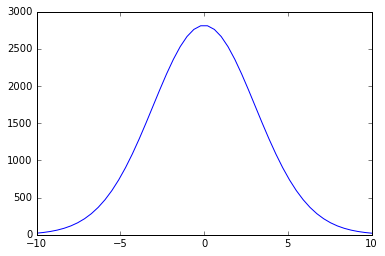

In [39]:
import matplotlib.pyplot as plt
from scipy import special
x = np.linspace(-10,10,50)
y = special.iv(x,10) #fonction de Bessel
plt.plot(x,y)
plt.show()

# Scipy : Linalg

In [34]:
import numpy as np
from scipy import linalg
arr = np.array([[1,2],
                [3,4]])

In [35]:
linalg.det(arr)

-2.0

In [59]:
arr = np.random.normal(0,1,(3,3))
linalg.inv(arr)

array([[-0.88657724,  0.08187574, -0.43186246],
       [ 0.13117251,  0.18006752,  1.66504392],
       [-0.50842064, -0.39938082,  0.12479783]])

In [63]:
uarr, spec, vharr = linalg.svd(arr)
sarr = np.diag(spec)
sarr

array([[2.45347234, 0.        , 0.        ],
       [0.        , 1.03549207, 0.        ],
       [0.        , 0.        , 0.56468783]])

In [75]:
uarr.dot(sarr)

array([[-0.34582762, -0.99030779,  0.1445192 ],
       [ 2.42605181, -0.12769263,  0.04731501],
       [-0.11917378,  0.27427888,  0.54382703]])

# Scipy : Interpolate

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

measured_time = np.linspace(0,1,10)
interpolation_time = np.linspace(0,1,50)

In [172]:
noise = (np.random.random(10)*2 - 1)*1e-1
measures = np.sin(2*np.pi*measured_time) + noise

plt.scatter(measured_time,measures,color='blue',label='measures')

In [173]:
linear_interp = interp1d(measured_time, measures)
linear_results = linear_interp(interpolation_time)
plt.plot(interpolation_time,linear_results,color='green',
         linestyle='-',label='linear interp')

In [174]:
cubic_interp = interp1d(measured_time,measures,kind='cubic')
cubic_results = cubic_interp(interpolation_time)
plt.plot(interpolation_time,cubic_results,color='red',
         linestyle='-',label='cubic interp')

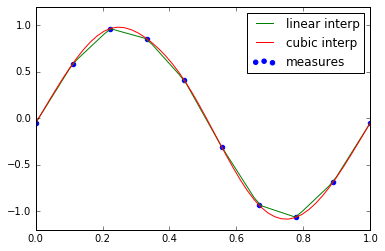

In [175]:
plt.legend(loc='upper right')
plt.xlim(0,1)
plt.ylim(-1.2,1.2)
plt.show()

# Scipy : optimize.curve_fit

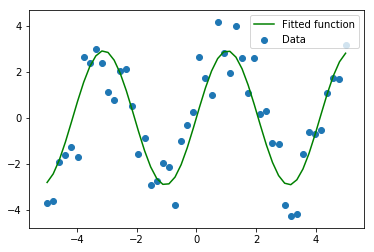

fitted param : [ 2.91480089  1.51631159]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

def test_fun(x,a,b):
    return a * np.sin(b*x)

x_data = np.linspace(-5,5,50)
y_data = test_fun(x_data,2.9,1.5) + np.random.normal(size=50)

param, param_covariance = optimize.curve_fit(test_fun,x_data,
                                             y_data,p0=[2,2])

plt.plot(x_data,test_fun(x_data,param[0],param[1]),
         label='Fitted function',color='green')
plt.scatter(x_data,y_data,label='Data')

plt.legend(loc='upper right')
plt.show()
print('fitted param :', param)

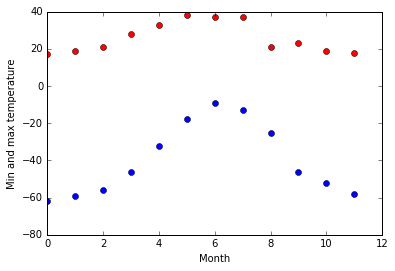

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

temp_max = np.array([17,19,21,28,33,38,37,37,21,23,19,18])
temp_min = np.array([-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58])

months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

plt.show()

In [32]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])
res_max

array([ 26.76662021, -10.20852748,   0.07386469])

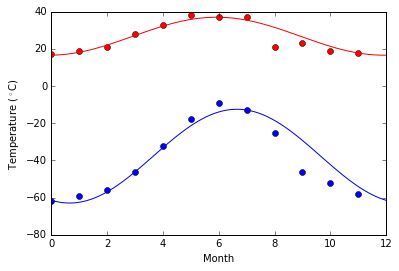

In [33]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

# Scipy : Optimize.minimize

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def g(x):
    return (4 - 2.1 * x[0]**2 + x[0]**4/3) * x[0]**2 + x[0]*x[1] + (4*x[1]**2 - 4) * x[1]**2

x = np.linspace(-2,2,100)
y = np.linspace(-1,1,100)

X, Y = np.meshgrid(x, y)
Z = g([X, Y])

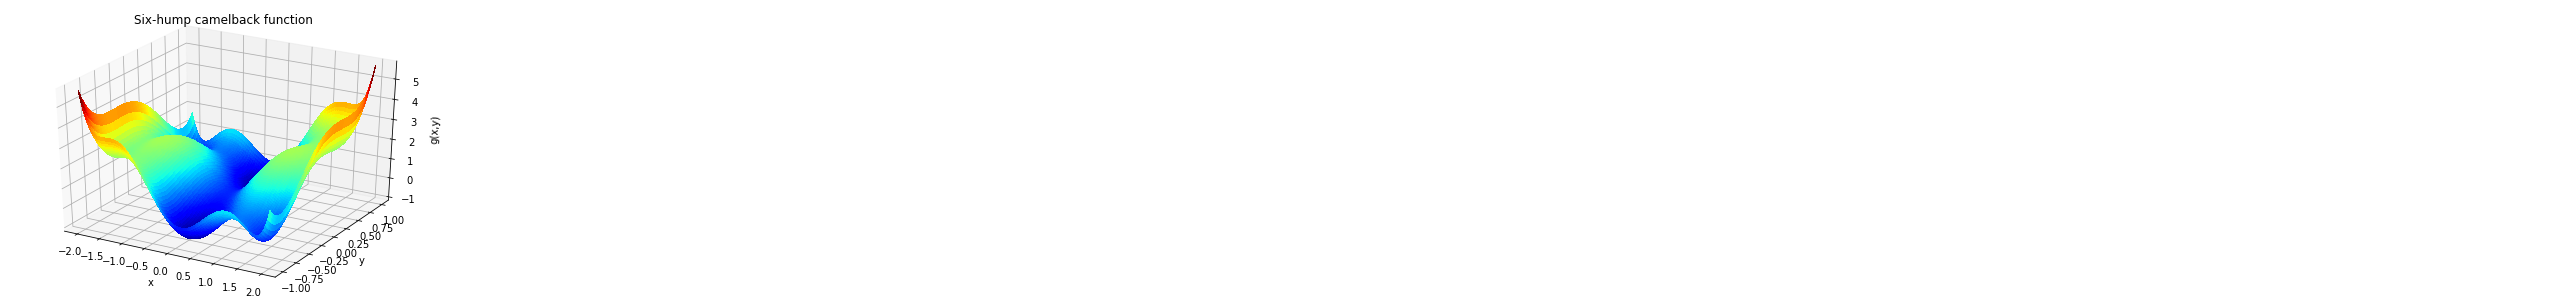

In [4]:
fig = plt.figure()
ax = Axes3D(fig)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.jet,
                linewidth=0, antialiased=False)
ax.set_xlabel("x")
ax.set_ylabel('y')
ax.set_zlabel('g(x,y)')
ax.set_title('Six-hump camelback function')
plt.show()

In [120]:
res = optimize.minimize(g, x0=[0,-0.5])
res

      fun: -1.0316284534898557
 hess_inv: array([[ 0.12941905, -0.00790844],
       [-0.00790844,  0.06166136]])
      jac: array([ 0.00000000e+00, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 0.08984201, -0.71265645])

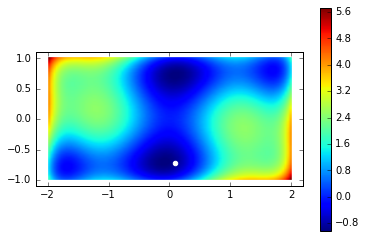

In [121]:
plt.figure()
plt.imshow(Z, extent=[-2,2, -1, 1])
plt.colorbar()
plt.scatter(res.x[0],res.x[1],color='white')

plt.show()

# Scipy : optimize.root

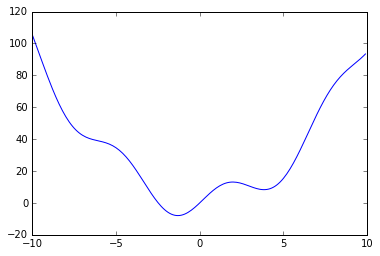

In [236]:
def f(x):
    return x**2 + 10 * np.sin(x)

x = np.arange(-10,10,0.1)
plt.plot(x,f(x))
plt.show()

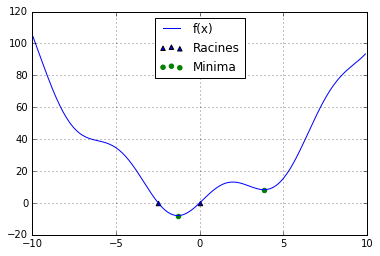

In [238]:
xmin, xmin2 = optimize.minimize_scalar(f), optimize.minimize(f,x0=5)
root, root2 = optimize.root(f,x0=0), optimize.root(f,x0=-2.5)

plt.plot(x,f(x),label='f(x)')
plt.scatter([root.x, root2.x], [f(root.x),f(root2.x)],
            marker='^',label='Racines')
plt.scatter([xmin.x,xmin2.x], [f(xmin.x),f(xmin2.x)],
            color='green',label='Minima')

plt.grid(True)
plt.legend(loc='upper center')
plt.xlim(-10,10)
plt.show()

# Scipy : stats

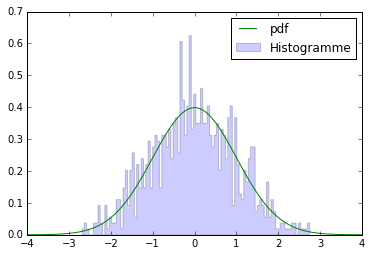

In [392]:
import numpy as np
from scipy import stats

samples = np.random.normal(size=1000)
x = np.linspace(-4,4,100)
pdf = stats.norm.pdf(x)

plt.hist(samples,100,label='Histogramme', normed=True,
        histtype='stepfilled', alpha=0.2)
plt.plot(x,pdf,label='pdf',color='green')
plt.legend(loc='upper right')
plt.show()

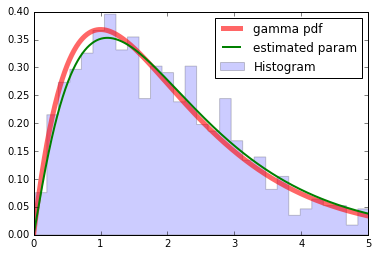

In [393]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

a = 2
x = np.linspace(0,5,1000)
obs = np.random.gamma(a,size=1000)
plt.hist(obs,55,normed=True,histtype='stepfilled',
         alpha=0.2,label='Histogram')
plt.plot(x,stats.gamma.pdf(x,a),'r-',lw=5,alpha=0.6,
         label='gamma pdf')
plt.plot(x,stats.gamma.pdf(x,stats.gamma.fit(obs)[0]),
         lw=2,label='estimated param')
plt.legend()
plt.xlim(0,5)
plt.show()

In [249]:
np.mean(obs),np.median(obs)

(1.9011482245912266, 1.5540192594523012)

In [353]:
a = np.random.normal(0,1,size=100)
b = np.random.normal(1,1,size=10)
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-2.3641716694186923, pvalue=0.01985707426917117)

# Scipy : fftpack

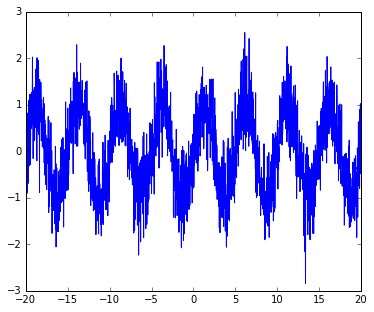

In [394]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(-20, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.show()

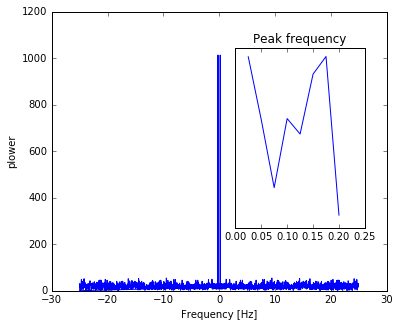

In [359]:
from scipy import fftpack

# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])
plt.show()

/Users/kevinzagalo/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


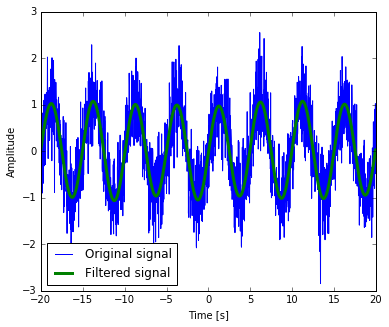

In [360]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')
plt.show()

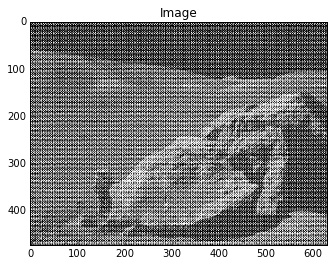

In [366]:
img = plt.imread('moonlanding.png').astype(float)
plt.imshow(img,plt.cm.gray)
plt.title('Image')
plt.show()

/Users/kevinzagalo/anaconda/lib/python3.5/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


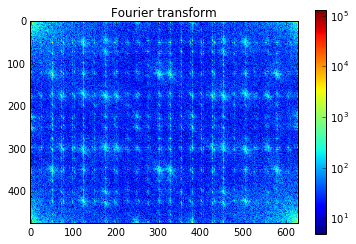

In [362]:
im_fft = fftpack.fft2(img)

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')
plt.show()

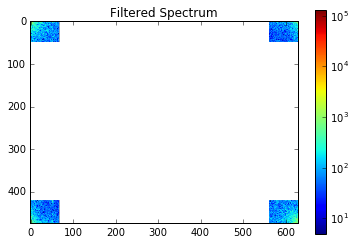

In [363]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.11

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')
plt.show()

/Users/kevinzagalo/anaconda/lib/python3.5/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


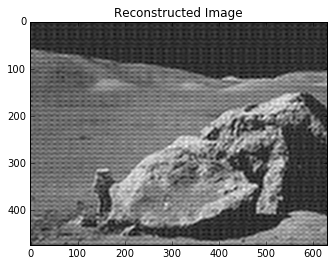

In [364]:
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')
plt.show()

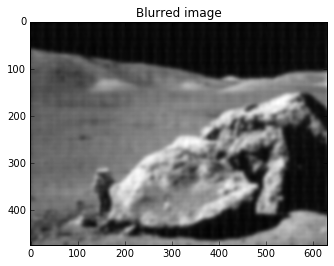

In [365]:
from scipy import ndimage
im_blur = ndimage.gaussian_filter(img, 4)

plt.figure()
plt.imshow(im_blur, plt.cm.gray)
plt.title('Blurred image')

plt.show()

# Scipy : signal.resample

/Users/kevinzagalo/anaconda/lib/python3.5/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/Users/kevinzagalo/anaconda/lib/python3.5/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/Users/kevinzagalo/anaconda/lib/python3.5/site-packages/scipy/signal/signaltools.py:2230: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

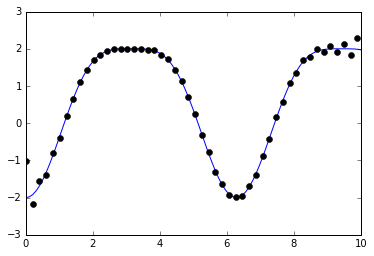

In [347]:
t = np.linspace(0,10,100)
x = np.sin(t)**2 - 2 * np.cos(t)

from scipy import signal
x_resampled = signal.resample(x,50)

plt.plot(t,x)
plt.plot(t[::2],x_resampled, 'ko')
plt.show()

# Scipy : signal.detrend

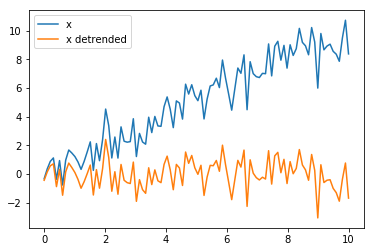

In [7]:
t = np.linspace(0,10,100)
x = t + np.random.normal(size=100)

from scipy import signal
x_detrended = signal.detrend(x)

plt.plot(t,x,label='x')
plt.plot(t,x_detrended,label='x detrended')
plt.legend(loc='upper left')
plt.show()

In [367]:
from scipy import misc
face = misc.face(gray=True)

from scipy import ndimage
shifted_face = ndimage.shift(face, (50,50))
shifted_face2 = ndimage.shift(face,(50,50), mode='nearest')
rotated_face = ndimage.rotate(face,30)
cropped_face = face[50:-50,50:-50]
zoomed_face = ndimage.zoom(face,2)
zoomed_face.shape

(1536, 2048)

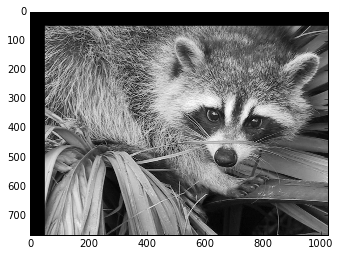

In [374]:
plt.imshow(shifted_face,plt.cm.gray)
plt.show()

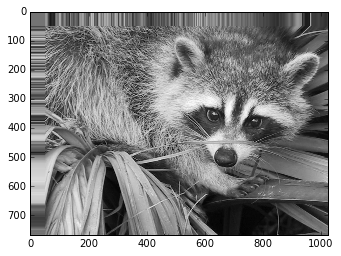

In [375]:
plt.imshow(shifted_face2,plt.cm.gray)
plt.show()

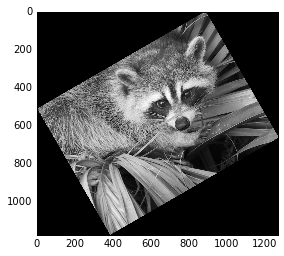

In [377]:
plt.imshow(rotated_face,plt.cm.gray)
plt.show()

# Matplotlib : Nuage de points

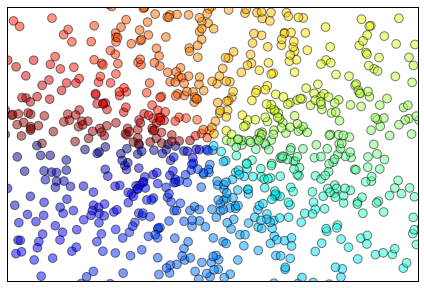

In [10]:
import numpy as np
import matplotlib.pyplot as plt

n = 1024
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(Y, X)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.scatter(X, Y, s=75, c=T, alpha=.5)

plt.xlim(-1.5, 1.5)
plt.xticks(())
plt.ylim(-1.5, 1.5)
plt.yticks(())

plt.show()

# Matplotlib : Histogramme

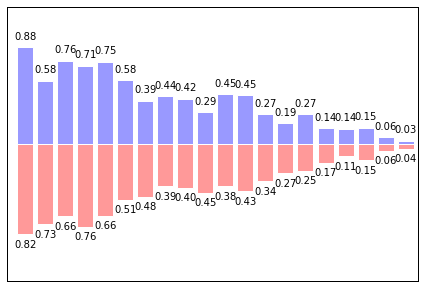

In [397]:
import numpy as np
import matplotlib.pyplot as plt

n = 20
X = np.arange(n)
Y1 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)
Y2 = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')

for x, y in zip(X, Y1):
    plt.text(x + 0.4, y + 0.05, '%.2f' % y, ha='center', va= 'bottom')

for x, y in zip(X, Y2):
    plt.text(x + 0.4, -y - 0.05, '%.2f' % y, ha='center', va= 'top')

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(-1.25, 1.25)
plt.yticks(())

plt.show()

# Matplotlib : Contours de fonctions

/Users/kevinzagalo/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/kevinzagalo/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


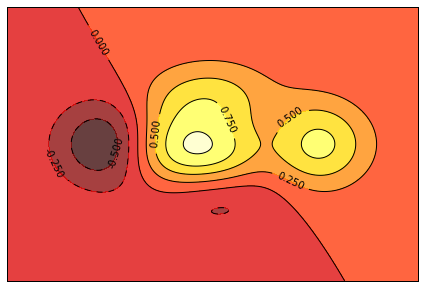

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return (1 - x / 2 + x**5 + y**3) * np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.contourf(X, Y, f(X, Y), 8, alpha=.75, cmap=plt.cm.hot)
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)
plt.clabel(C, inline=1, fontsize=10)

plt.xticks(())
plt.yticks(())
plt.show()

# Matplotlib : Imshow

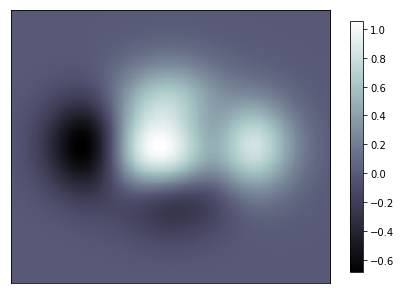

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (1 - x / 2 + x ** 5 + y ** 3 ) * np.exp(-x ** 2 - y ** 2)

n = 100
x = np.linspace(-3, 3, 3.5 * n)
y = np.linspace(-3, 3, 3.0 * n)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.imshow(Z, interpolation='nearest', cmap='bone', origin='lower')
plt.colorbar(shrink=.92)

plt.xticks(())
plt.yticks(())
plt.show()

# Matplotlib : Camembert

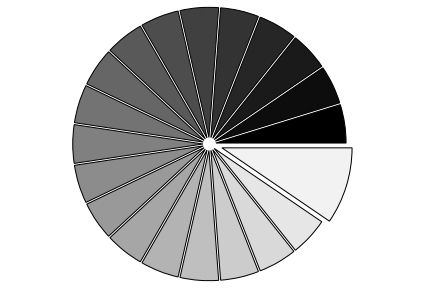

In [14]:
import numpy as np
import matplotlib.pyplot as plt

n = 20
Z = np.ones(n)
Z[-1] *= 2

plt.axes([0.025, 0.025, 0.95, 0.95])

plt.pie(Z, explode=Z*.05, colors = ['%f' % (i/float(n)) for i in range(n)])
plt.axis('equal')
plt.xticks(())
plt.yticks()

plt.show()


# Matplotlib : Champ de vecteurs

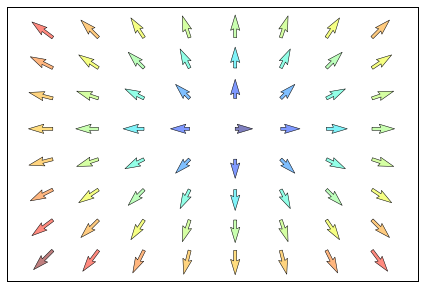

In [15]:
import numpy as np
import matplotlib.pyplot as plt

n = 8
X, Y = np.mgrid[0:n, 0:n]
T = np.arctan2(Y - n / 2., X - n/2.)
R = 10 + np.sqrt((Y - n / 2.0) ** 2 + (X - n / 2.0) ** 2)
U, V = R * np.cos(T), R * np.sin(T)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.quiver(X, Y, U, V, R, alpha=.5)
plt.quiver(X, Y, U, V, edgecolor='k', facecolor='None', linewidth=.5)

plt.xlim(-1, n)
plt.xticks(())
plt.ylim(-1, n)
plt.yticks(())

plt.show()

# Matplotlib : Plot3D

/Users/kevinzagalo/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/kevinzagalo/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6447: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


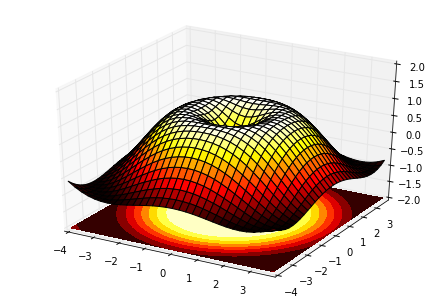

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.hot)
ax.contourf(X, Y, Z, zdir='z', offset=-2, cmap=plt.cm.hot)
ax.set_zlim(-2, 2)

plt.show()